### Manipulation of Trans Proteomic Pipeline (TPP) PeptideProphet peptide validation results from Comet database searched*Prochlorococus MED4* LC-MS/MS data using python.

Starting with: 

- PeptideProphet output (.xlxs and .csv) of PTM-optimized database searches >90% probability

Goal:

- Files with stripped (no PTMs or tryptic ends) peptide lists and
- Columns with #'s of each modification in every sequence
- Column with stripped peptide lengths (# amino acids)

For technical duplicates, I exported PeptideProphet results as both Excel files and as CSVs into my ETNP 2017 git repo:

In [1]:
cd /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/

/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP


In [21]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#from matplotlib_venn import venn2
#from matplotlib_venn import venn3
from matplotlib_venn import venn3, venn3_circles
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [11]:
#read the Excel file into a dataframe we name 'peppro' using the pandas read_excel function

peppro = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_combine_PTMopt_15ppm_pepprophet_interact.pep.xlsx")

print(len(peppro))

#look at the dataframe
peppro.head()

114593


,probability,spectrum,expect,ions,peptide,calc_neutral_pep_mass,precursor_intensity,protein,protein_descr
0,1.0,022016_RAL4_95_MED2_trypsin_1.04846.04846.2,0.00005,2020-08-18 00:00:00,K.VGAATETEM[147.04]K.Y,1051.4856,132625.0,"PMM0452,PMM1436",| groEL | chaperonin GroEL
1,1.0,022016_RAL4_95_MED2_trypsin_1.04907.04907.4,86.50000,1990-08-01 00:00:00,K.SFNK[142.11]EDWSSAYQ[129.04]N[115.03]VEK.E,1946.8534,24067.2,PMM0280,| PMM0280 | retinal pigment epithelial membran...
2,1.0,022016_RAL4_95_MED2_trypsin_1.05237.05237.2,0.00704,2020-09-16 00:00:00,K.AGQIASSPR.T,885.4668,1070260.0,PMM1607,| psaC | photosystem I subunit VII
3,1.0,022016_RAL4_95_MED2_trypsin_1.05296.05296.3,0.06600,19/44,R.QGSPNRPGTPYR.Q,1328.6585,1849220.0,"PMM1494,PMM1494",| infB | translation initiation factor IF-2
4,1.0,022016_RAL4_95_MED2_trypsin_1.05297.05297.4,0.87300,27/84,R.QYHPDVNKDPGAEDK.F,1711.7802,687898.0,PMM0017,| dnaJ | DnaJ protein


The peptide column has the residues before and after the tryptic terminii as well as masses of modified residues (e.g., 160.03 Da for carbamidomethylated cysteine). We want to make new columns with all that information and make a column with only the 'stripped' peptide sequence that's just amino acids - this we can then align against other sequences, for example.

Modified residues were allowed for:

    fixed carbamodimethylation of cysteine 57.021464 C
    varialbe oxidation of methionine: 15.9949 M
    variable deamidation of asparagine, glumatine: 0.984016 NQ
    variable methylation of lysine and arginine: 14.015650 KR

We'll then write this manipulated dataframe to a new file.

In [12]:
# use str.strip with indexing by str[0] to add a column with the peptide's left terminus
peppro['L terminus'] = peppro['peptide'].astype(str).str[0]

# use str.strip with indexing by str[-1] to add a column with the peptide's left terminus
peppro['R terminus'] = peppro['peptide'].str.strip().str[-1]

# use a count function to enumerate the # of ccarbamidomethylated C's in each peptide
peppro['c-carb'] = peppro['peptide'].str.count("160.03")

# use a count function to enumerate the # of oxidized M's in each peptide
peppro['m-oxid'] = peppro['peptide'].str.count("147.04")

# use a count function to enumerate the # of deamidated N's in each peptide
peppro['n-deam'] = peppro['peptide'].str.count("115.03")

# use a count function to enumerate the # of deamidated Q's in each peptide
peppro['q-deam'] = peppro['peptide'].str.count("129.04")

# use a count function to enumerate the # of iron adducted K's in each peptide
#peppro['k-iron'] = peppro['peptide'].str.count("182.11")

# use a count function to enumerate the # of methylated K's in each peptide
peppro['k-meth'] = peppro['peptide'].str.count("142.11")

# use a count function to enumerate the # of methylated R's in each peptide
peppro['r-meth'] = peppro['peptide'].str.count("170.12")

# create a column with 'stripped' peptide sequences using strip
peppro['stripped peptide'] = peppro['peptide'].str[2:].str[:-2].str.replace(r"\[.*\]","")

# add a column with the stripped peptide length (number of AAs)
peppro['stripped length'] = peppro['stripped peptide'].apply(len)

# write modified dataframe to new txt file
peppro.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_combine_PTMopt_15ppm_PepProp.csv")

# check out the results
peppro.head()

,probability,spectrum,expect,ions,peptide,calc_neutral_pep_mass,precursor_intensity,protein,protein_descr,L terminus,R terminus,c-carb,m-oxid,n-deam,q-deam,k-meth,r-meth,stripped peptide,stripped length
0,1.0,022016_RAL4_95_MED2_trypsin_1.04846.04846.2,0.00005,2020-08-18 00:00:00,K.VGAATETEM[147.04]K.Y,1051.4856,132625.0,"PMM0452,PMM1436",| groEL | chaperonin GroEL,K,Y,0,1,0,0,0,0,VGAATETEMK,10
1,1.0,022016_RAL4_95_MED2_trypsin_1.04907.04907.4,86.50000,1990-08-01 00:00:00,K.SFNK[142.11]EDWSSAYQ[129.04]N[115.03]VEK.E,1946.8534,24067.2,PMM0280,| PMM0280 | retinal pigment epithelial membran...,K,E,0,0,1,1,1,0,SFNKVEK,7
2,1.0,022016_RAL4_95_MED2_trypsin_1.05237.05237.2,0.00704,2020-09-16 00:00:00,K.AGQIASSPR.T,885.4668,1070260.0,PMM1607,| psaC | photosystem I subunit VII,K,T,0,0,0,0,0,0,AGQIASSPR,9
3,1.0,022016_RAL4_95_MED2_trypsin_1.05296.05296.3,0.06600,19/44,R.QGSPNRPGTPYR.Q,1328.6585,1849220.0,"PMM1494,PMM1494",| infB | translation initiation factor IF-2,R,Q,0,0,0,0,0,0,QGSPNRPGTPYR,12
4,1.0,022016_RAL4_95_MED2_trypsin_1.05297.05297.4,0.87300,27/84,R.QYHPDVNKDPGAEDK.F,1711.7802,687898.0,PMM0017,| dnaJ | DnaJ protein,R,F,0,0,0,0,0,0,QYHPDVNKDPGAEDK,15


In [13]:
# keep only peptides  >95% probability
# need to convert Xcorr column from strings to numeric so we can use loc
peppro['probability'] = pd.to_numeric(peppro['probability'])

peppro95 = peppro.loc[peppro['probability'] >= 0.95]

# keep only peptide column 
pep95 = peppro95[["stripped peptide"]]

# write altered dataframe to new txt file
# used header and index parameters to get rid of 'Peptide' header and the indexing

pep95.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_combine_PTMopt_15ppm_PepPro_stripped_peptides_95.txt", header=False, index=False)

# removing redundancy
pep95dedup = pd.DataFrame.drop_duplicates(pep95)

print("# redundant peppro peptides >2.5 XCorr", len(pep95))
print("# nonredundant peppro peptides >2.5 XCOrr", len(pep95dedup))

pep95.head()

# redundant peppro peptides >2.5 XCorr 31056
# nonredundant peppro peptides >2.5 XCOrr 10546


,stripped peptide
0,VGAATETEMK
1,SFNKVEK
2,AGQIASSPR
3,QGSPNRPGTPYR
4,QYHPDVNKDPGAEDK


In [16]:
# keep only peptides  >99% probability
# need to convert Xcorr column from strings to numeric so we can use loc
peppro['probability'] = pd.to_numeric(peppro['probability'])

peppro99 = peppro.loc[peppro['probability'] >= 0.99]

# keep only peptide column 
pep99 = peppro99[["stripped peptide"]]

# write altered dataframe to new txt file
# used header and index parameters to get rid of 'Peptide' header and the indexing

pep99.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_combine_PTMopt_15ppm_PepPro_stripped_peptides_99.txt", header=False, index=False)

# removing redundancy
pep99dedup = pd.DataFrame.drop_duplicates(pep99)

print("# redundant peppro peptides >2.5 XCorr", len(pep99))
print("# nonredundant peppro peptides >2.5 XCOrr", len(pep99dedup))

pep99.head()

# redundant peppro peptides >2.5 XCorr 28416
# nonredundant peppro peptides >2.5 XCOrr 9907


,stripped peptide
0,VGAATETEMK
1,SFNKVEK
2,AGQIASSPR
3,QGSPNRPGTPYR
4,QYHPDVNKDPGAEDK


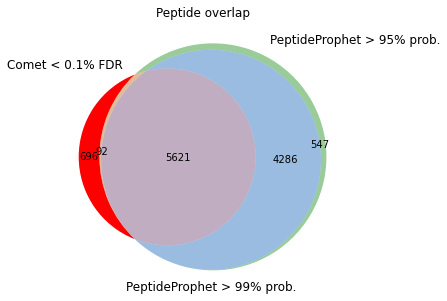

In [25]:
plt.figure(figsize=(6,6))
v = venn3(subsets=(696, 547, 92, 0, 0, 4286, 5621), set_labels = ('Comet < 0.1% FDR', 'PeptideProphet > 95% prob.', 'PeptideProphet > 99% prob.'))
v.get_patch_by_id('100').set_alpha(1.0)
#v.get_patch_by_id('100').set_color('white')
#v.get_label_by_id('100').set_text('de novo only')
#v.get_label_by_id('A').set_text('Set "A"')
#c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
#c[0].set_lw(1.0)
#c[0].set_ls('dotted')
plt.title("Peptide overlap")
#plt.annotate('de novo only', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             #ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             #arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))

plt.tight_layout()

# save figure in analysis and also in manuscript git repos
plt.savefig("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/MED4-Comet_ProtProp-overlap.png", dpi=300, transparent=True)
plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/MED4-Comet_ProtProp-overlap.png", dpi=300, transparent=True)
plt.show()